# Convert molecule names to SMILES

In [1]:
!pip install git+https://github.com/mcs07/PubChemPy.git
!pip install pandas
!pip install rdkit

  Cloning https://github.com/mcs07/PubChemPy.git to /tmp/pip-req-build-4vkubarx
  Running command git clone --filter=blob:none --quiet https://github.com/mcs07/PubChemPy.git /tmp/pip-req-build-4vkubarx
  Resolved https://github.com/mcs07/PubChemPy.git to commit a5d86463dab32dd3589479cf9b9737e26651dd7d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for PubChemPy: filename=pubchempy-1.0.4-py3-none-any.whl size=21354 sha256=7cfe83e894a4c6af8cff3fcce8ec4108a67b0951e85e43d6ae89679f32596783
  Stored in directory: /tmp/pip-ephem-wheel-cache-xcgstk4z/wheels/ef/9c/d9/4fc18c3c8e318d83a3f6db4d4446460439839bf2848de2985a
Successfully built PubChemPy
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 52.1 MB/s eta 0:00:00


In [2]:
import pubchempy as pcp
import pandas as pd
from rdkit.Chem import MolFromSmiles, Draw
from rdkit.Chem.Draw import MolsToGridImage

data = ['amoxicillin',
				'cefazolin',
				'meropenem',
				'aztreonam',
				'clavulanic acid']

smiles = []

for i in data:
	try:
		smiles.append(pcp.get_compounds(i,'name')[0].smiles)
	except:
		smiles.append("")

df_data = pd.DataFrame(data,columns=['name'])
df_smiles = pd.DataFrame(smiles,columns=['smiles'])
data_smiles = pd.concat([df_data, df_smiles],axis=1)

In [3]:
data_smiles

,name,smiles
0,amoxicillin,CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)[C@@H]...
1,cefazolin,CC1=NN=C(S1)SCC2=C(N3[C@@H]([C@@H](C3=O)NC(=O)...
2,meropenem,C[C@@H]1[C@@H]2[C@H](C(=O)N2C(=C1S[C@H]3C[C@H]...
3,aztreonam,C[C@H]1[C@@H](C(=O)N1S(=O)(=O)O)NC(=O)/C(=N\OC...
4,clavulanic acid,C1[C@@H]2N(C1=O)[C@H](/C(=C/CO)/O2)C(=O)O


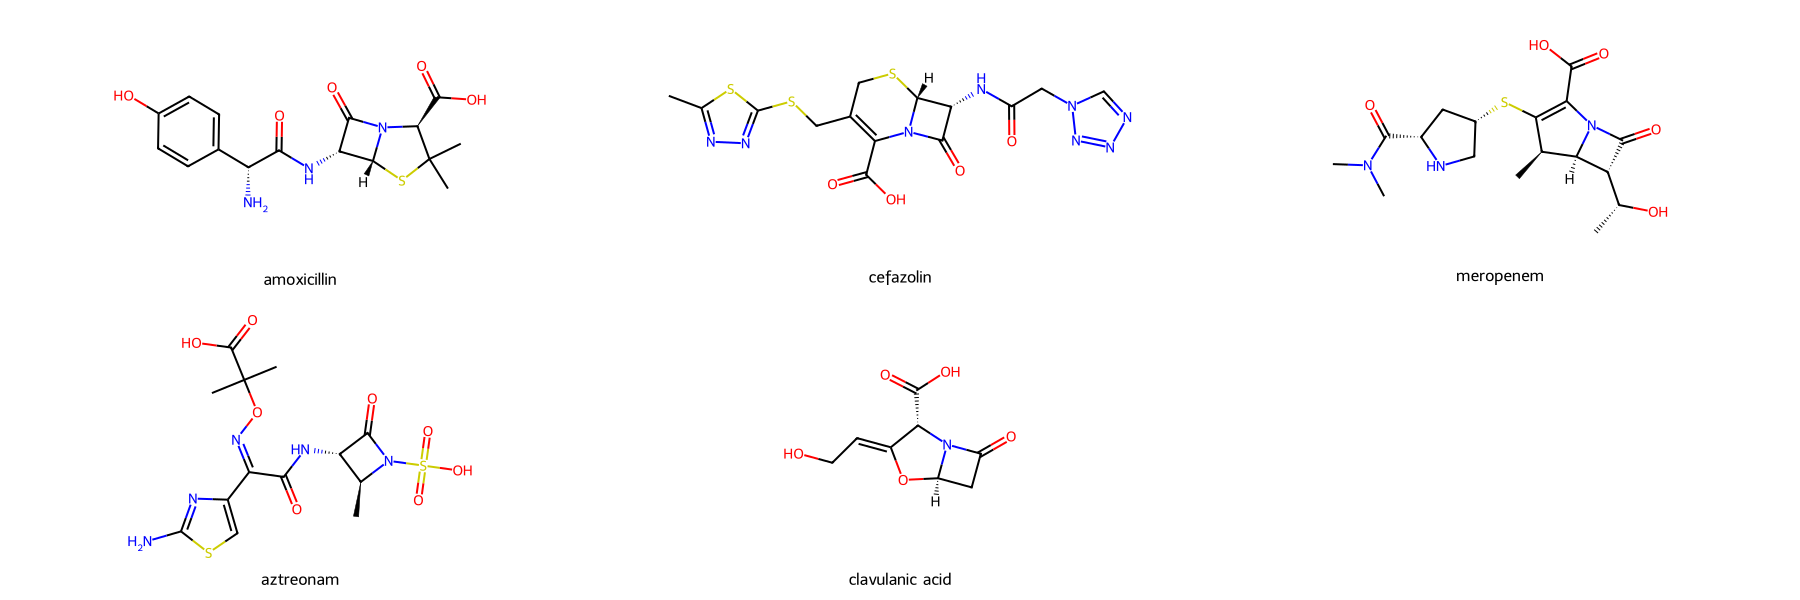

In [4]:
mol = [MolFromSmiles(i) for i in data_smiles['smiles']]

legends = []
for i in range(len(data_smiles)):
    name = data_smiles['name'].iloc[i]
    legend = f'{name}'
    legends.append(legend)

opts = Draw.MolDrawOptions()
img = MolsToGridImage(mol,
                      subImgSize=(600, 300),
                      legends=legends,
                      returnPNG=True,
                      drawOptions=opts)
img